In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_file_path = "C:\\Users\\Admin\\Downloads\\archive (1).zip"
df = pd.read_csv(data_file_path)

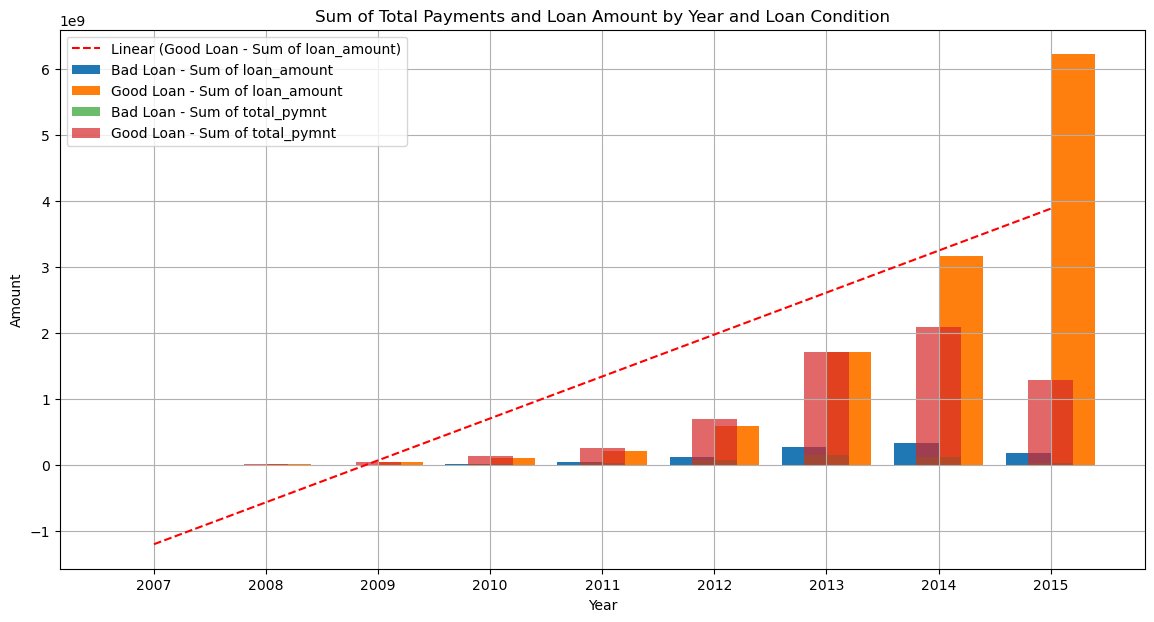

In [12]:
# Summarize the data by year and loan condition
summary_df = df.groupby(['year', 'loan_condition']).agg(
    total_pymnt_sum=('total_pymnt', 'sum'),
    loan_amount_sum=('loan_amount', 'sum')
).reset_index()

# Create a bar chart with linear trend line
fig, ax = plt.subplots(figsize=(14, 7))

# Set the years range
years = np.arange(2007, 2016)

# Plotting the bars for each loan condition
for condition in summary_df['loan_condition'].unique():
    condition_data = summary_df[summary_df['loan_condition'] == condition]
    ax.bar(condition_data['year'] - 0.2 if condition == "Bad Loan" else condition_data['year'] + 0.2, 
           condition_data['loan_amount_sum'], 
           width=0.4, 
           label=f'{condition} - Sum of loan_amount')

# Adding the total payments as additional bars with different colors
for condition in summary_df['loan_condition'].unique():
    condition_data = summary_df[summary_df['loan_condition'] == condition]
    ax.bar(condition_data['year'], 
           condition_data['total_pymnt_sum'], 
           width=0.4, 
           label=f'{condition} - Sum of total_pymnt', alpha=0.7)

# Adding the linear trend line for Good Loan - Sum of loan_amount
good_loan_data = summary_df[summary_df['loan_condition'] == 'Good Loan']
z = np.polyfit(good_loan_data['year'], good_loan_data['loan_amount_sum'], 1)
p = np.poly1d(z)
ax.plot(good_loan_data['year'], p(good_loan_data['year']), "r--", label='Linear (Good Loan - Sum of loan_amount)')

# Customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Sum of Total Payments and Loan Amount by Year and Loan Condition')
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.legend()
ax.grid(True)

plt.show()